In [85]:
import pandas as pd
import numpy as np
import seaborn as sns

# All data sourced from the City of Melbourne's Open Data Website:  
### https://data.melbourne.vic.gov.au/

# Pedestrian Sensor Datasets
Melbourne's City Data website provided two datasets related to sidewalk pedestrian sensors. One has hourly counts for each sensor from 2009 to the present, and the other has location coordinates for each sensor. After cleaning these two datasets I will combine them so that the location coordinates are included with the hourly counts

Great visual to see current trends in pedestrian traffic provided by the city
http://www.pedestrian.melbourne.vic.gov.au/#date=20-05-2020&time=0

## cleaning sensor datasets

### data set with hourly sensor records from 2009 to present

In [6]:
sensor_counts = pd.read_csv('./Original CSVs/Pedestrian_Counting_System___2009_to_Present__counts_per_hour_.csv')

In [7]:
sensor_counts.head()
#ID and Sensor_Name won't be neccessary to include

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
0,2887628,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,2887629,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,39,Alfred Place,604
2,2887630,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,37,Lygon St (East),216
3,2887631,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
4,2887632,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,36,Queen St (West),774


In [8]:
sensor_counts.isnull().sum()

ID               0
Date_Time        0
Year             0
Month            0
Mdate            0
Day              0
Time             0
Sensor_ID        0
Sensor_Name      0
Hourly_Counts    0
dtype: int64

In [9]:
sensor_counts.drop(['ID', 'Sensor_Name'], axis = 1, inplace = True)

In [10]:
sensor_counts.columns

Index(['Date_Time', 'Year', 'Month', 'Mdate', 'Day', 'Time', 'Sensor_ID',
       'Hourly_Counts'],
      dtype='object')

In [11]:
#rename columns to all lowercase
sensor_counts.rename({'Date_Time': 'datetime', 'Year': 'year', 'Month':'month', 'Mdate': 'mdate', 
                      'Day': 'day', 'Time': 'time', 'Sensor_ID': 'sensor_id', 'Hourly_Counts': 'hourly_counts'}, 
                     axis = 1, inplace = True)

In [12]:
sensor_counts.head()

,datetime,year,month,mdate,day,time,sensor_id,hourly_counts
0,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,34,300
1,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,39,604
2,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,37,216
3,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,40,627
4,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,36,774


### dataset with sensor location coordinates

In [13]:
sensor_locations = pd.read_csv('./Original CSVs/Pedestrian_Counting_System_-_Sensor_Locations.csv')

In [14]:
sensor_locations.head()

,sensor_id,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location
0,59,Building 80 RMIT,RMIT_T,2019/02/13,A,NaN,North,South,-37.808256,144.963049,"(-37.80825648, 144.96304859)"
1,23,Spencer St-Collins St (South),Col623_T,2013/09/02,A,NaN,East,West,-37.819093,144.954527,"(-37.81909256, 144.95452749)"
2,20,Chinatown-Lt Bourke St (South),LtB170_T,2013/09/06,A,NaN,East,West,-37.811729,144.968247,"(-37.81172913, 144.9682466)"
3,34,Flinders St-Spark La,Fli32_T,2014/06/08,A,NaN,East,West,-37.815380,144.974150,"(-37.81537985, 144.9741505)"
4,57,Bourke St Bridge,BouBri_T,2018/08/13,A,NaN,West,East,-37.817673,144.950256,"(-37.8176735, 144.95025595)"


In [15]:
#only keep columns with sensor id and location values
sensor_locations.drop(['sensor_description', 'sensor_name', 'installation_date', 'status', 'note', 'direction_1',
                      'direction_2'], axis = 1, inplace = True)

In [16]:
sensor_locations.isnull().sum()

sensor_id    0
latitude     0
longitude    0
location     0
dtype: int64

In [17]:
#sort by sensor id 
sensor_locations = sensor_locations.sort_values(by ='sensor_id')

In [18]:
#save this as a csv -- allows quick access to location coordinates of each sensor
sensor_locations.to_csv('./cleaned datasets/single_sensor_locations.csv', header = sensor_locations.columns, index=False)

### join two sensor dataframes

In [19]:
location_counts = pd.merge(sensor_locations, sensor_counts, on='sensor_id', how='inner')

In [20]:
location_counts.head()

,sensor_id,latitude,longitude,location,datetime,year,month,mdate,day,time,hourly_counts
0,1,-37.813494,144.965153,"(-37.8134944, 144.96515324)",11/01/2019 06:00:00 PM,2019,November,1,Friday,18,3183
1,1,-37.813494,144.965153,"(-37.8134944, 144.96515324)",11/01/2019 07:00:00 PM,2019,November,1,Friday,19,2533
2,1,-37.813494,144.965153,"(-37.8134944, 144.96515324)",11/01/2019 08:00:00 PM,2019,November,1,Friday,20,2070
3,1,-37.813494,144.965153,"(-37.8134944, 144.96515324)",11/01/2019 09:00:00 PM,2019,November,1,Friday,21,1450
4,1,-37.813494,144.965153,"(-37.8134944, 144.96515324)",11/01/2019 10:00:00 PM,2019,November,1,Friday,22,779


In [21]:
location_counts.shape

(3091351, 11)

In [22]:
location_counts.sensor_id.value_counts().sort_values()[:20]
#it could be useful to drop sensors that do not have as many recorded counts
#for now leaving them in, but may drop in the future

65      456
63     1057
64     1800
60     2291
62     4392
55     4896
61     6600
59     9912
57    12720
58    13152
56    14328
41    15095
54    15312
38    17662
49    20064
51    20448
45    20879
48    21156
47    22691
46    22752
Name: sensor_id, dtype: int64

In [37]:
#save to csv
#this is the cleaned dataframe that has sensor counts for all locations
location_counts.to_csv('./cleaned datasets/location_counts.csv', header = location_counts.columns, index=False)

### Looking at trends in sensor counts
Look to see which sensors have valid records for a full calendar year at a time. Some sensors were added at later years, and some stop working at points throughout the year

In [38]:
sorted(location_counts.sensor_id.unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65]

In [32]:
def get_year_trends(year):
    sensor_df = location_counts[location_counts.year == year]
    if len(sensor_df.month.value_counts()) == 12: #check to see if there is records for all 12 months
        valid_sensors = []
        for x in sensor_df.sensor_id.unique():
            sensor = sensor_df[sensor_df.sensor_id == x]
            if len(sensor.month.value_counts()) == 12:
                valid_sensors.append(x)
            else:
                pass
         
        sensors_per_year = []
        for y in valid_sensors:
            limited_sensors = sensor_df[sensor_df.sensor_id == y]
            for z in range(1, 13):
                yearly_sensors = limited_sensors[limited_sensors.month == z]
                if len(yearly_sensors.mdate.value_counts()) >= 27: #check if there is at least 27 days p
                    sensors_per_year.append(y)
            else:
                pass
            
    else:
        print('there is not 12 months of valid records')
        
    return sorted(valid_sensors)
    

In [33]:
get_year_trends(2010)

[2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [176]:
sensors_2011 = get_year_trends(2011)
sensors_2012 = get_year_trends(2012)
sensors_2013 = get_year_trends(2013)
sensors_2014 = get_year_trends(2014)
sensors_2015 = get_year_trends(2015)
sensors_2016 = get_year_trends(2016)
sensors_2017 = get_year_trends(2017)
sensors_2018 = get_year_trends(2018)
sensors_2019 = get_year_trends(2019)

sensors_2011

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [187]:
print(get_year_trends(2019))

[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 17, 18, 19, 20, 21, 23, 24, 26, 27, 28, 30, 31, 34, 35, 36, 37, 39, 40, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58]


In [53]:
#make list of sensors that are in all years 2011-2019
#these will be the sensors used in time series/model samples

sensors_in_all_years = []
for x in sensors_2011:
    if x in sensors_2012 and x in sensors_2012 and x in sensors_2013 and x in sensors_2014 and x in sensors_2015 and x in sensors_2016 and x in sensors_2017 and x in sensors_2018 and x in sensors_2019:
        sensors_in_all_years.append(x)
        
sensors_in_all_years

[2, 6, 8, 9, 10, 11, 18]

In [47]:
#create df with only valid sensors per year
def valid_sensors_per_year(sensor_list, year):
    return sensor_counts[(sensor_counts.year == year) & (sensor_counts.sensor_id.isin(sensor_list))]

In [54]:
valid_2011 = valid_sensors_per_year(sensors_2011, 2011)
valid_2012 = valid_sensors_per_year(sensors_2012, 2012)
valid_2013 = valid_sensors_per_year(sensors_2013, 2013)
valid_2014 = valid_sensors_per_year(sensors_2014, 2014)
valid_2015 = valid_sensors_per_year(sensors_2015, 2015)
valid_2016 = valid_sensors_per_year(sensors_2016, 2016)
valid_2017 = valid_sensors_per_year(sensors_2017, 2017)
valid_2018 = valid_sensors_per_year(sensors_2018, 2018)
valid_2019 = valid_sensors_per_year(sensors_2019, 2019)

### clean datetime

In [169]:
all_sensors = pd.concat([valid_2011, valid_2012, valid_2013, valid_2014, valid_2015, valid_2016, valid_2017,
                         valid_2018, valid_2019])
all_sensors.drop('datetime', axis = 1, inplace =True)
all_sensors.rename({'day': 'weekday', 'mdate': 'day', 'time': 'hour'}, axis =1, inplace = True)


In [171]:
#change month to integers 1-12

months = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June':6, 'July': 7, 'August': 8,
         'September': 9, 'October': 10, 'November': 11, 'December': 12}

all_sensors.month = sensor_counts.month.map(months)

In [173]:
all_sensors['datetime'] = pd.to_datetime(all_sensors[['year', 'month', 'day', 'hour']])

In [174]:
all_sensors

,year,month,day,weekday,hour,sensor_id,hourly_counts,datetime
289505,2011,1,1,Saturday,0,2,985,2011-01-01 00:00:00
289506,2011,1,1,Saturday,0,3,2547,2011-01-01 00:00:00
289507,2011,1,1,Saturday,0,4,3514,2011-01-01 00:00:00
289508,2011,1,1,Saturday,0,5,5021,2011-01-01 00:00:00
289509,2011,1,1,Saturday,0,6,3514,2011-01-01 00:00:00
...,...,...,...,...,...,...,...,...
2966829,2019,10,31,Thursday,23,52,216,2019-10-31 23:00:00
2966830,2019,10,31,Thursday,23,54,104,2019-10-31 23:00:00
2966832,2019,10,31,Thursday,23,56,162,2019-10-31 23:00:00
2966833,2019,10,31,Thursday,23,57,73,2019-10-31 23:00:00


In [175]:
#save csv with all sensors that are valid for at least one year at a time

all_sensors.to_csv('./cleaned datasets/all_valid_sensors.csv', header = all_sensors.columns, index=False)

# Datasets with city features and location coordinates

## Dataset with building information across the city
 "Data collected as part of the City of Melbourne's Census of Land Use and Employment (CLUE). The data covers the period 2002-2018. It shows selected building attributes including location, construction year, refurbished year, number of floors above ground, predominant space use, bicycle/shower facilities and building accessibility. "

In [89]:
buildings = pd.read_csv('./Original CSVs/Buildings_with_name__age__size__accessibility__and_bicycle_facilities.csv')

In [90]:
buildings.head()

,Census year,Block ID,Property ID,Base property ID,Building name,Street address,CLUE small area,Construction year,Refurbished year,Number of floors (above ground),Predominant space use,Accessibility type,Accessibility type description,Accessibility rating,Bicycle spaces,Has showers,x coordinate,y coordinate,Location
0,2002,337,111382,111382,NaN,99-101 Munster Terrace,North Melbourne,1990.0,2000.0,1,Wholesale,NaN,NaN,NaN,NaN,NaN,144.9426,-37.8011,"(-37.80106468, 144.9425944)"
1,2002,562,110840,110840,NaN,5 Halford Lane,Kensington,NaN,NaN,2,House/Townhouse,NaN,NaN,NaN,NaN,NaN,144.9209,-37.7915,"(-37.79151557, 144.9208696)"
2,2002,236,106827,106827,NaN,12 Murchison Street,Carlton,NaN,NaN,1,House/Townhouse,NaN,NaN,NaN,NaN,NaN,144.9740,-37.7998,"(-37.799826, 144.9740267)"
3,2002,229,101462,101462,NaN,188 Canning Street,Carlton,NaN,NaN,2,House/Townhouse,NaN,NaN,NaN,NaN,NaN,144.9739,-37.7941,"(-37.79405814, 144.9738662)"
4,2002,114,104097,104097,NaN,108 Franklin Street,Melbourne (CBD),1901.0,NaN,2,House/Townhouse,NaN,NaN,NaN,NaN,NaN,144.9593,-37.8082,"(-37.80822013, 144.9592588)"


In [91]:
buildings.drop(['Block ID', 'Property ID', 'Base property ID', 'Building name', 'Construction year', 'Location',
                'Street address', 'CLUE small area', 'Refurbished year', 'Has showers', 'Accessibility type description'], axis = 1, inplace = True)

In [92]:
buildings.isnull().sum()

Census year                             0
Number of floors (above ground)         0
Predominant space use                   0
Accessibility type                  29803
Accessibility rating                29803
Bicycle spaces                     180088
x coordinate                           15
y coordinate                           15
dtype: int64

In [93]:
#fill bicycle spaces that don't have values with 0
buildings['Bicycle spaces'].fillna(0, inplace = True)

In [94]:
#drop 15 buildings that don't have location coordinates
buildings.dropna(subset = ['x coordinate'], axis = 0, inplace = True)

In [95]:
buildings['Accessibility type'].value_counts()
#since there is lots of NaN's in this column, it may be dropped later

Not determined or not applicable    116718
Low level of accessibility           42223
High level of accessibility          23841
Moderate level of accessibility       8350
Name: Accessibility type, dtype: int64

In [96]:
#only keep years 2011 - 2018 
buildings = buildings[buildings['Census year'] >2010]
buildings.head()

,Census year,Number of floors (above ground),Predominant space use,Accessibility type,Accessibility rating,Bicycle spaces,x coordinate,y coordinate
924,2011,2,House/Townhouse,Low level of accessibility,1.0,0.0,144.9815,-37.8177
925,2011,2,House/Townhouse,NaN,NaN,0.0,144.9292,-37.7931
926,2011,1,House/Townhouse,NaN,NaN,0.0,144.9409,-37.7905
927,2011,1,House/Townhouse,NaN,NaN,0.0,144.9280,-37.7940
928,2011,1,House/Townhouse,NaN,NaN,0.0,144.9315,-37.7926


In [97]:
buildings.columns

Index(['Census year', 'Number of floors (above ground)',
       'Predominant space use', 'Accessibility type', 'Accessibility rating',
       'Bicycle spaces', 'x coordinate', 'y coordinate'],
      dtype='object')

In [98]:
#rename columns
buildings.rename({'Census year': 'year', 'Number of floors (above ground)': 'n_floors', 
                 'Predominant space use': 'building_use', 'Accessibility type': 'access_type',
                 'Accessibility rating': 'access_rating', 'Bicycle spaces': 'bike_spaces',
                 'x coordinate': 'longitude', 'y coordinate': 'latitude'}, axis =1, inplace = True)

In [99]:
buildings.isnull().sum()

year                0
n_floors            0
building_use        0
access_type      9745
access_rating    9745
bike_spaces         0
longitude           0
latitude            0
dtype: int64

In [100]:
buildings.access_type = buildings.access_type.replace({'Not determined or not applicable': np.nan, 'Low level of accessibility': 'low', 
                               'Moderate level of accessibility': 'moderate', 'High level of accessibility': 'high'})

In [101]:
#change access type to categorical
cat_type = pd.CategoricalDtype(categories = ['low', 'moderate', 'high'], ordered = True)
buildings.access_type = buildings.access_type.astype(cat_type)

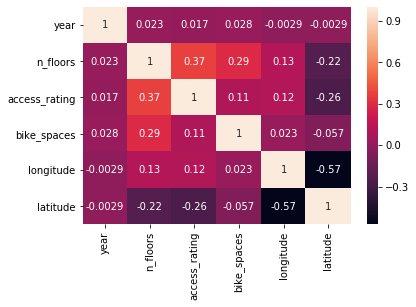

In [102]:
#see correlations
sns.heatmap(buildings.corr(), annot = True);

In [103]:
buildings.head()

,year,n_floors,building_use,access_type,access_rating,bike_spaces,longitude,latitude
924,2011,2,House/Townhouse,low,1.0,0.0,144.9815,-37.8177
925,2011,2,House/Townhouse,NaN,NaN,0.0,144.9292,-37.7931
926,2011,1,House/Townhouse,NaN,NaN,0.0,144.9409,-37.7905
927,2011,1,House/Townhouse,NaN,NaN,0.0,144.9280,-37.7940
928,2011,1,House/Townhouse,NaN,NaN,0.0,144.9315,-37.7926


In [104]:
buildings.dtypes

year                int64
n_floors            int64
building_use       object
access_type      category
access_rating     float64
bike_spaces       float64
longitude         float64
latitude          float64
dtype: object

In [105]:
#save to csv
buildings.to_csv('./cleaned datasets/buildings_clean.csv', header = buildings.columns, index=False)

## Dataset with Landmarks & Places of Interest
"This dataset contains a description and co-ordinates of places of interest within the City of Melbourne.

Themes include: Community Use, Education Centre, Health Services, Leisure/Recreation, Mixed Use, Office, Place Of Assembly, Place of Worship, Purpose Built, Retail, Transport, Vacant Land

Sub-themes include: Art Gallery/Museum, Church, Function/Conference/Exhibition Centre, Informal Outdoor Facility (Park/Garden/Reserve), Major Sports & Recreation Facility, Office, Public Buildings, Public Hospital, Railway Station, Retail/Office/Carpark, Tertiary (University), Theatre Live"

In [106]:
landmarks = pd.read_csv('./Original CSVs/Landmarks_and_places_of_interest__including_schools__theatres__health_services__sports_facilities__places_of_worship__galleries_and_museums..csv')

In [107]:
landmarks.head()

,Theme,Sub Theme,Feature Name,Co-ordinates
0,Transport,Railway Station,Flemington Bridge Railway Station,"(-37.7881645889621, 144.939277838304)"
1,Mixed Use,Retail/Office/Carpark,Council House 2 (CH2),"(-37.8142591432011, 144.966638432727)"
2,Place Of Assembly,Library,The Melbourne Athenaeum Library,"(-37.8148855756416, 144.967291289941)"
3,Leisure/Recreation,Informal Outdoor Facility (Park/Garden/Reserve),Carlton Gardens South,"(-37.8060684577258, 144.971266479841)"
4,Place of Worship,Church,St Francis Church,"(-37.8118847831837, 144.962422614541)"


In [108]:
landmarks.isnull().sum()

Theme           0
Sub Theme       0
Feature Name    0
Co-ordinates    0
dtype: int64

In [109]:
#split co-ordinates into latitude and longitude columns like building data is in
split_data = landmarks['Co-ordinates'].str.strip(')').str.strip('(').str.split(', ')
landmarks['latitude'] = split_data.apply(lambda x: x[0])
landmarks['longitude'] = split_data.apply(lambda x: x[1])

In [110]:
landmarks.drop('Co-ordinates', axis = 1, inplace = True)

In [111]:
landmarks.head()

,Theme,Sub Theme,Feature Name,latitude,longitude
0,Transport,Railway Station,Flemington Bridge Railway Station,-37.7881645889621,144.939277838304
1,Mixed Use,Retail/Office/Carpark,Council House 2 (CH2),-37.8142591432011,144.966638432727
2,Place Of Assembly,Library,The Melbourne Athenaeum Library,-37.8148855756416,144.967291289941
3,Leisure/Recreation,Informal Outdoor Facility (Park/Garden/Reserve),Carlton Gardens South,-37.8060684577258,144.971266479841
4,Place of Worship,Church,St Francis Church,-37.8118847831837,144.962422614541


In [113]:
#rename columns
landmarks.rename({'Theme': 'theme', 'Sub Theme': 'sub_theme', 'Feature Name': 'feature_name'}, axis =1, inplace = True)

In [114]:
landmarks.groupby(['theme', 'sub_theme'])['sub_theme'].count()

theme                                 sub_theme                                      
Community Use                         Cemetery                                            1
                                      Fire Station                                        1
                                      Government Building                                 1
                                      Police Station                                      3
                                      Public Buildings                                   13
                                      Visitor Centre                                      2
Education Centre                      Further Education                                   1
                                      Primary Schools                                     4
                                      School - Primary and Secondary Education            2
                                      Secondary Schools                               

In [115]:
landmarks.to_csv('./cleaned datasets/landmarks_clean.csv', header = landmarks.columns, index=False)

## Dataset with Bike Share Locations and capacity
### Even though this program ended in 2019, the docks were in use for the majority of years that this analysis will use
"This dataset show the historical Melbourne Bike Share docks. This program came to an end in Novemer 2019.

Contains the bike share dock locations that were deployed across Melbourne as part of the Melbourne Bike Share Program.

Melbourne Bike Share is a joint RACV/Victorian Government bicycle hire scheme. It allows commuters to hire a bike from a dock location and return it to another dock location in the city. This dataset contains the bike share dock locations and capacity across the city."

In [116]:
bikes = pd.read_csv('./Original CSVs/Bike_Share_Dock_Locations.csv')

In [117]:
bikes.head()

,station_id,name,rental_method,capacity,lat,lon,location
0,2,Harbour Town - Docklands Dve - Docklands,"CREDITCARD,KEY",23,-37.814022,144.939521,"(-37.814022, 144.939521)"
1,6,State Library - Swanston St / Little Lonsdale ...,"CREDITCARD,KEY",11,-37.810702,144.964417,"(-37.810702, 144.964417)"
2,7,Bourke Street Mall - 205 Bourke St - City,"CREDITCARD,KEY",11,-37.813088,144.967437,"(-37.813088, 144.967437)"
3,8,Melbourne Uni - Tin Alley - Carlton,"CREDITCARD,KEY",19,-37.796250,144.960858,"(-37.79625, 144.960858)"
4,9,RMIT - Swanston St / Franklin St - City,"CREDITCARD,KEY",7,-37.807699,144.963095,"(-37.807699, 144.963095)"


In [118]:
bikes.drop(['rental_method', 'location', 'name'], axis =1, inplace= True)

In [119]:
bikes.isnull().sum()

station_id    0
capacity      0
lat           0
lon           0
dtype: int64

In [121]:
bikes.rename({'lat': 'latitude', 'lon': 'longitude'}, axis =1, inplace = True)

In [122]:
bikes.head()

,station_id,capacity,latitude,longitude
0,2,23,-37.814022,144.939521
1,6,11,-37.810702,144.964417
2,7,11,-37.813088,144.967437
3,8,19,-37.796250,144.960858
4,9,7,-37.807699,144.963095


In [123]:
bikes.to_csv('./cleaned datasets/bikes_clean.csv', header = bikes.columns, index=False)

## City Lighting
"This dataset contains information such as location, lighting type and wattage of feature lighting across City of Melbourne.

Feature lights are usually found around high profile areas of the city."

In [124]:
lights = pd.read_csv('./Original CSVs/Feature_Lighting__including_light_type__wattage_and_location_.csv')

In [125]:
lights.head()

,asset_number,asset_description,lamp_type_lupvalue,lamp_rating_w,mounting_type_lupvalue,lat,lon,location
0,1542034,Feature Lighting - Shrine of Remembrance,13.0,70.0,Pole: Multiple Fixed,-37.832430,144.972851,"(-37.83243026700112, 144.97285142540412)"
1,1348116,Feature Lighting - Docklands,5.0,70.0,Inground,-37.819371,144.952721,"(-37.81937093721541, 144.9527211538597)"
2,1347754,Feature Lighting - Docklands,5.0,70.0,Inground,-37.814309,144.941508,"(-37.81430907663625, 144.9415082516051)"
3,1541768,Feature Lighting -,13.0,35.0,Pole: Multiple Fixed,-37.823777,144.947362,"(-37.82377720278515, 144.9473620390991)"
4,1542387,Feature Lighting -,13.0,35.0,Pole: Multiple Fixed,-37.823550,144.947258,"(-37.823549964115635, 144.94725830188167)"


In [126]:
lights.drop(['asset_number', 'asset_description', 'mounting_type_lupvalue', 'location'], axis = 1, inplace = True)

In [127]:
lights.isnull().sum()

lamp_type_lupvalue    1093
lamp_rating_w         4458
lat                      0
lon                      0
dtype: int64

In [128]:
lights.shape

(8564, 4)

In [130]:
lights.rename({'lat': 'latitude', 'lon': 'longitude'}, axis =1, inplace = True)

In [131]:
lights.head()

,lamp_type_lupvalue,lamp_rating_w,latitude,longitude
0,13.0,70.0,-37.832430,144.972851
1,5.0,70.0,-37.819371,144.952721
2,5.0,70.0,-37.814309,144.941508
3,13.0,35.0,-37.823777,144.947362
4,13.0,35.0,-37.823550,144.947258


In [132]:
lights.to_csv('./cleaned datasets/lights_clean.csv', header = lights.columns, index=False)

## Street Infrastructure
"The City of Melbourne owns and maintains various objects and pieces of equipment installed on streets and roads for various purposes. This dataset includes Barbeques, Bicycle Rails, Bin Corrals, Bollards, Drinking Fountains, Floral Crate/Planter Boxs, Hoops, Horse Troughs, Information Pillars, Litter Bins, Picnic Setting, Seats."

In [148]:
street_inf = pd.read_csv('./Original CSVs/Street_furniture_including_bollards__bicycle_rails__bins__drinking_fountains__horse_troughs__planter_boxes__seats__barbecues.csv')

In [149]:
street_inf.head()

,GIS_ID,DESCRIPTION,ASSET_CLASS,ASSET_TYPE,MODEL_NO,MODEL_DESCR,DIVISION,COMPANY,LOCATION_DESC,CONDITION_RATING,EVALUATION_DATE,EASTING,NORTHING,UploadDate,CoordinateLocation
0,1074394,Bicycle Rails - Stainless Steel Bicycle Hoop,Outdoor Furniture,Bicycle Rails,200101-004,Bicycle Rails - Stainless Steel Bicycle Hoop,Engineering Services Group,City of Melbourne,Lonsdale Street between Spring Street and Exhi...,4.00,10/04/2019,321290.32,5813330.45,16/04/2020,"(-37.80994298252108, 144.9698553381076)"
1,1074441,Bicycle Rails - Stainless Steel Bicycle Hoop,Outdoor Furniture,Bicycle Rails,200101-004,Bicycle Rails - Stainless Steel Bicycle Hoop,Engineering Services Group,City of Melbourne,Barry Street between Leicester Street and Pelh...,3.78,12/04/2019,320372.35,5814159.81,16/04/2020,"(-37.802292402724426, 144.959638879039)"
2,1074542,Bicycle Rails - Stainless Steel Bicycle Hoop,Outdoor Furniture,Bicycle Rails,200101-004,Bicycle Rails - Stainless Steel Bicycle Hoop,Engineering Services Group,City of Melbourne,Wills Tower & Wills Court approximately 38m SE...,3.69,12/04/2019,320168.48,5813234.36,16/04/2020,"(-37.81058822870216, 144.9570947832389)"
3,1074589,Bicycle Rails - Stainless Steel Bicycle Hoop,Outdoor Furniture,Bicycle Rails,200101-004,Bicycle Rails - Stainless Steel Bicycle Hoop,Engineering Services Group,City of Melbourne,Shiel Street between Dryburgh Street and Canni...,3.64,12/04/2019,318829.95,5814778.95,16/04/2020,"(-37.79641089316797, 144.9422841239329)"
4,1074624,Bicycle Rails - Stainless Steel Bicycle Hoop,Outdoor Furniture,Bicycle Rails,200101-004,Bicycle Rails - Stainless Steel Bicycle Hoop,Engineering Services Group,City of Melbourne,Drummond Street between Queensberry Street and...,3.71,12/04/2019,321110.75,5813953.97,16/04/2020,"(-37.80429145086489, 144.96797056759425)"


In [150]:
street_inf.drop(['GIS_ID', 'DESCRIPTION', 'MODEL_NO', 'MODEL_DESCR', 'DIVISION', 'COMPANY',
                'LOCATION_DESC', 'EVALUATION_DATE', 'EASTING', 'NORTHING', 'UploadDate'], axis = 1, inplace = True)

In [151]:
#split coordinates into lat/long coordinate columns
split_data = street_inf['CoordinateLocation'].str.strip(')').str.strip('(').str.split(', ')
street_inf['latitude'] = split_data.apply(lambda x: x[0])
street_inf['longitude'] = split_data.apply(lambda x: x[1])

In [152]:
street_inf.drop('CoordinateLocation', axis = 1, inplace = True)

In [153]:
#rename columns to be only lowercase
street_inf.rename({'ASSET_CLASS': 'asset_class', 'ASSET_TYPE': 'feature', 'CONDITION_RATING': 'condition_rating'},
                 axis = 1, inplace = True)

In [154]:
street_inf.head()

,asset_class,feature,condition_rating,latitude,longitude
0,Outdoor Furniture,Bicycle Rails,4.00,-37.80994298252108,144.9698553381076
1,Outdoor Furniture,Bicycle Rails,3.78,-37.802292402724426,144.959638879039
2,Outdoor Furniture,Bicycle Rails,3.69,-37.81058822870216,144.9570947832389
3,Outdoor Furniture,Bicycle Rails,3.64,-37.79641089316797,144.9422841239329
4,Outdoor Furniture,Bicycle Rails,3.71,-37.80429145086489,144.96797056759425


In [155]:
street_inf.isnull().sum()

asset_class            0
feature                0
condition_rating    2014
latitude               0
longitude              0
dtype: int64

In [156]:
street_inf.shape

(22928, 5)

In [157]:
street_inf.asset_class.value_counts()
#drop asset class since it is all outdoor furniture

Outdoor Furniture    22928
Name: asset_class, dtype: int64

In [158]:
street_inf.drop('asset_class', axis =1, inplace = True)

In [160]:
street_inf.feature.value_counts()

Bollard                     9069
Bicycle Rails               5838
Seat                        3339
Litter Bin                  3247
Tree Guard                   451
Drinking Fountain            301
Hoop                         202
Floral Crate/Planter Box     189
Picnic Setting               167
Barbeque                      62
Information Pillar            43
Horse Trough                  19
Bin Corral                     1
Name: feature, dtype: int64

In [161]:
street_inf.head()

,feature,condition_rating,latitude,longitude
0,Bicycle Rails,4.00,-37.80994298252108,144.9698553381076
1,Bicycle Rails,3.78,-37.802292402724426,144.959638879039
2,Bicycle Rails,3.69,-37.81058822870216,144.9570947832389
3,Bicycle Rails,3.64,-37.79641089316797,144.9422841239329
4,Bicycle Rails,3.71,-37.80429145086489,144.96797056759425


In [162]:
street_inf.to_csv('./cleaned datasets/street_inf_clean.csv', header = street_inf.columns, index=False)